<a href="https://colab.research.google.com/github/alinapradhan/Oppenheimer-Movie-Sentiment-Analysis/blob/main/Oppenheimer_Movie_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# Load the dataset
file_path = "Oppenheimer Sentiment Survey  (Responses) - Form Responses 1.csv"
df = pd.read_csv(file_path)

In [4]:
df.head()

,Timestamp,CHOP CHOP !! RATE THE MOVIEEEEE !!,Which word best describes how the movie made you feel ??????,Would you recommend Oppenheimer to others?
0,8/2/2025 0:36:33,4,Amazed,YESSS
1,8/2/2025 0:36:47,4,Amazed,MAYBE IDK
2,8/2/2025 0:38:10,3,Conflicted,NO
3,8/2/2025 0:38:19,1,Bored,NO
4,8/2/2025 0:38:27,2,Inspired,YESSS


In [5]:
# Clean and rename
df = df[[
    "CHOP CHOP !! RATE THE MOVIEEEEE !!",
    "Which word best describes how the movie made you feel ??????",
    "Would you recommend Oppenheimer to others?"
]].copy()
df.columns = ["rating", "emotion", "recommendation"]
df.dropna(inplace=True)

In [6]:
df.head()

,rating,emotion,recommendation
0,4,Amazed,YESSS
1,4,Amazed,MAYBE IDK
2,3,Conflicted,NO
3,1,Bored,NO
4,2,Inspired,YESSS


In [15]:
# Map recommendation to sentiment words and labels
word_mapping = {
    "NO": "Negative",
    "MAYBE IDK": "Neutral",
    "YESSS": "Positive"
}
numeric_mapping = {
    "Negative": -1,
    "Neutral": 0,
    "Positive": 1
}
df["sentiment_word"] = df["recommendation"].map(word_mapping)
df["sentiment"] = df["sentiment_word"].map(numeric_mapping)
df = df[df["sentiment"].isin([-1, 0, 1])]

In [16]:
# TF-IDF vectorize the emotion words
tfidf = TfidfVectorizer()
emotion_tfidf = tfidf.fit_transform(df["emotion"])

In [17]:
# Scale the rating (so it works with MultinomialNB)
scaler = MinMaxScaler()
rating_scaled = scaler.fit_transform(df[["rating"]])

In [18]:
# Combine features (hstack for sparse + dense)
from scipy.sparse import hstack
X = hstack([rating_scaled, emotion_tfidf])
y = df["sentiment"]

In [19]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Train Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [21]:
# Evaluate
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Negative", "Neutral", "Positive"]))

Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
     Neutral       0.00      0.00      0.00         2
    Positive       0.50      0.67      0.57         3

    accuracy                           0.33         6
   macro avg       0.17      0.22      0.19         6
weighted avg       0.25      0.33      0.29         6



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[0 0 1]
 [1 0 1]
 [1 0 2]]


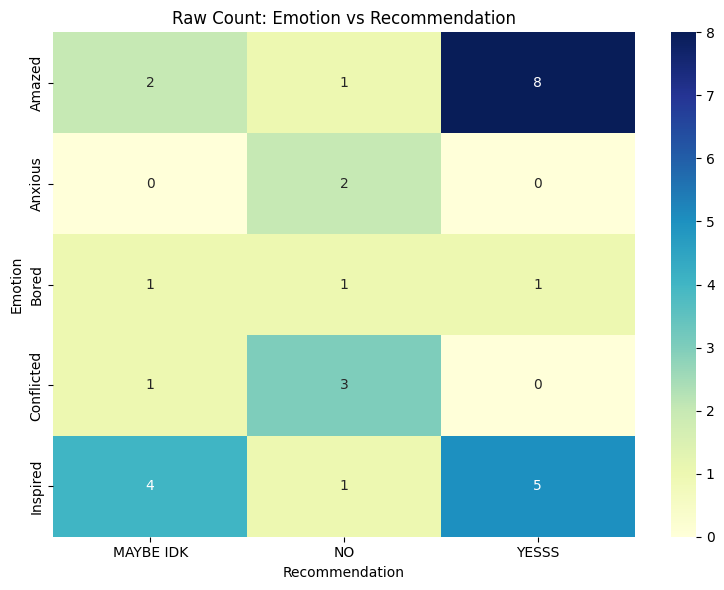

In [27]:
#Heatmap of emotion vs recommendation counts
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(emotion_counts, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Raw Count: Emotion vs Recommendation")
plt.ylabel("Emotion")
plt.xlabel("Recommendation")
plt.tight_layout()
plt.show()